Dataset : https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
#Load Dataset
path = os.getcwd() + '\\' + 'Data' +'\\' + 'Stroke' + '\\'
df_data = pd.read_csv(path + 'healthcare-dataset-stroke-data.csv')

In [3]:
df_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
#fill na with mean
bmi_mean = df_data['bmi'].mean()
df_data['bmi'].fillna(bmi_mean, inplace = True)

In [8]:
df_data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
df_data.duplicated().sum()

0

In [10]:
df_data.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1


In [11]:
#EDA 
tb1 = df_data.groupby(['stroke','ever_married']).agg({'id':'count'}).reset_index().rename(columns={'id':'Total', 'ever_married':'Ever Married'})
tb1

,stroke,Ever Married,Total
0,0,No,1728
1,0,Yes,3133
2,1,No,29
3,1,Yes,220


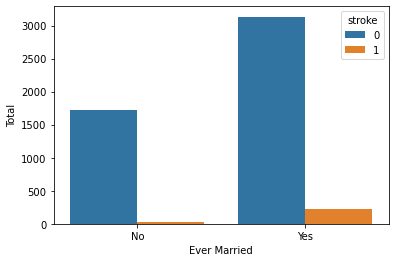

In [12]:
#Has Married?
sns.barplot(x = 'Ever Married', y = 'Total', hue ='stroke', data=tb1);

In [13]:
#Gender Distribution
df_data.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [14]:
tb2 = df_data.groupby(['stroke','gender']).agg({'id':'count'}).reset_index().rename(columns={'id':'Total', 'ever_married':'Ever Married'})
tb2

,stroke,gender,Total
0,0,Female,2853
1,0,Male,2007
2,0,Other,1
3,1,Female,141
4,1,Male,108


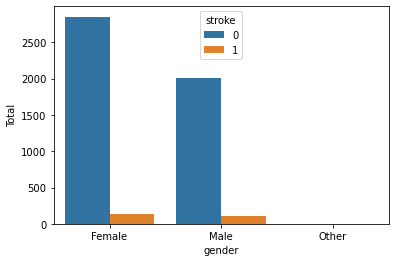

In [15]:
sns.barplot(x = 'gender', y = 'Total', hue ='stroke', data=tb2);

<AxesSubplot:>

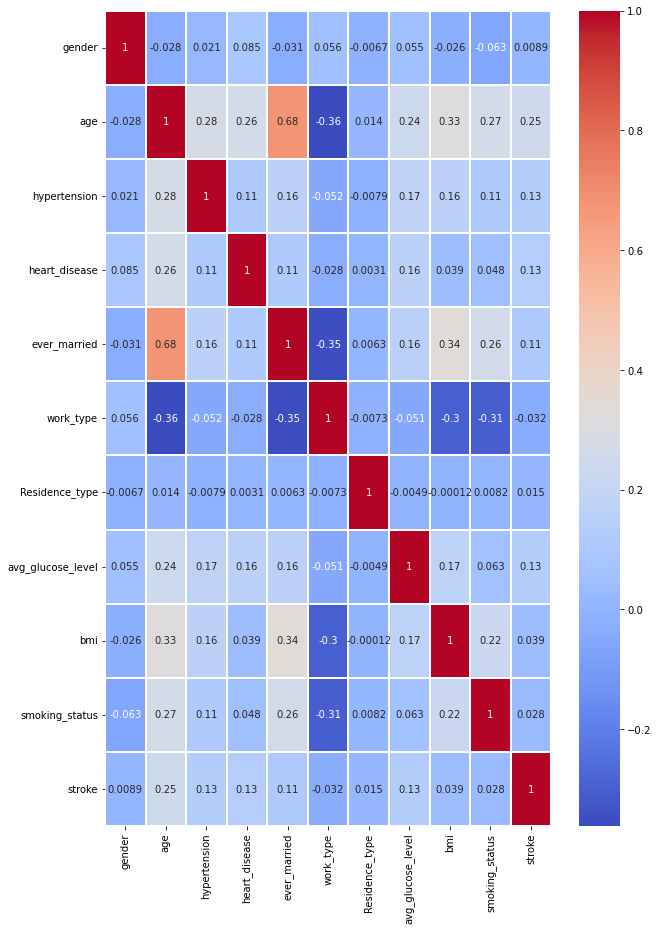

In [92]:
plt.figure(figsize=(10,15))
sns.heatmap(df_data.corr(), cmap='coolwarm', annot = True, linewidth = 2)

In [16]:
#Data Preprocessing

from sklearn.preprocessing import LabelEncoder
cols = ('gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status')
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df_data[c].values)) 
    df_data[c] = lbl.transform(list(df_data[c].values))

In [17]:
df_data.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1


In [18]:
df_data.drop(columns = 'id', inplace = True)

In [19]:
#X = feature, y = target
X = df_data.iloc[:,:-1]
y = df_data['stroke']

In [33]:
from sklearn.model_selection import train_test_split

import shap
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3832, 10) (1278, 10) (3832,) (1278,)


In [34]:
#Scalling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns = X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X.columns)

In [22]:
X_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1914,1,43.0,0,0,1,2,0,77.86,28.9,2
1751,0,65.0,0,0,1,2,1,88.82,28.2,1
396,1,60.0,1,0,1,2,0,213.37,36.0,2
1783,1,2.0,0,0,0,4,0,65.67,16.6,0
2361,0,30.0,0,0,1,2,1,101.98,23.2,0


In [23]:
X_train_scaled.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.182369,-0.012400,-0.329843,-0.240181,0.721550,-0.162044,-1.012606,-0.611726,-0.007987,0.585441
1,-0.845759,0.961818,-0.329843,-0.240181,0.721550,-0.162044,0.987551,-0.369349,-0.099483,-0.345821
2,1.182369,0.740405,3.031747,-0.240181,0.721550,-0.162044,-1.012606,2.385034,0.920043,0.585441
3,1.182369,-1.827988,-0.329843,-0.240181,-1.385905,1.677816,-1.012606,-0.881304,-1.615701,-1.277082
4,-0.845759,-0.588074,-0.329843,-0.240181,0.721550,-0.162044,0.987551,-0.078320,-0.753025,-1.277082


In [36]:
df_data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

📌 We are now encountered with the problem of unequal proportion of the target variables. If we just train like this, we may get a good accuracy but on new, unseen dataset, our model may not perform better.

📌 So, I'll use SMOTE oversampling for modelling as the number of datapoints generated using that are equal in proportion from this technique.

In [67]:
smote = SMOTE()
x_resample, y_resample = smote.fit_resample(X_train, y_train.ravel())
Xr_train, Xr_test, yr_train, yr_test = train_test_split(x_resample, y_resample, test_size = 0.3, random_state=1)
print(Xr_train.shape, Xr_test.shape, yr_train.shape, yr_test.shape)

(5121, 10) (2195, 10) (5121,) (2195,)


In [68]:
#Scaling data smote
Xr_train_scaled = scaler.fit_transform(Xr_train)
Xr_test_scaled = scaler.transform(Xr_test)

Xr_train_scaled = pd.DataFrame(Xr_train_scaled, columns = X.columns)
Xr_test_scaled = pd.DataFrame(Xr_test_scaled, columns = X.columns)

In [51]:
Xr_train_scaled.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,-0.640734,1.128776,-0.304290,-0.225271,0.674003,1.035156,-0.831209,-0.874376,-0.517940,-1.271749
1,-0.640734,-0.130164,3.286335,-0.225271,0.674003,-0.001890,1.203066,0.744293,-0.352292,1.832383


In [52]:
Xr_test_scaled.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,-0.640734,-0.076827,3.286335,-0.225271,0.674003,-1.038936,-0.831209,-0.980920,0.139073,-1.271749
1,1.560710,-1.479028,-0.304290,-0.225271,-1.483672,-2.075982,-0.831209,-0.361816,-0.672640,0.797672


In [78]:
pd.DataFrame(y_resample).value_counts()

0    3658
1    3658
dtype: int64

In [24]:
#CLassification Model with KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

def classification_eval (actual, prediction, name):
    cm = confusion_matrix(actual, prediction)
    tp = cm[1][1]
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    
    accuracy = round((tp+tn)/(tp+tn+fp+fn) * 100, 2)
    precision = round((tp)/(tp+fp) * 100, 2)
    recall = round((tp)/(tp+fn) * 100, 2)
    
    print('Evaluation Model : ', name)
    print(cm)
    print('Accuracy : ', accuracy, '%')
    print('Precision : ', precision, '%')
    print('Recall : ', recall, '%')

In [25]:
error_rate = []
# Will take some time
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

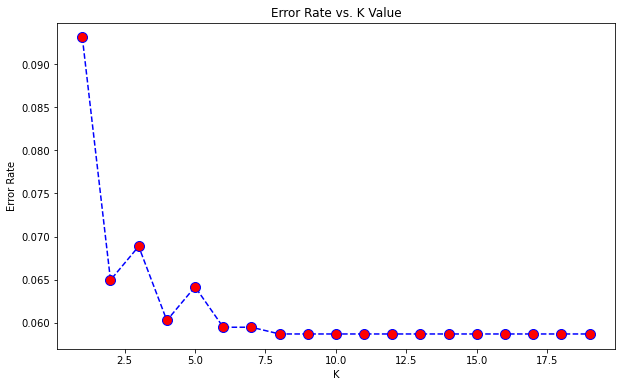

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [138]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=7)

In [139]:
y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)

In [140]:
classification_eval(y_train, y_train_pred, 'KNN Training')

Evaluation Model :  KNN Training
[[3657    1]
 [ 171    3]]
Accuracy :  95.51 %
Precision :  75.0 %
Recall :  1.72 %


In [114]:
classification_eval(y_test, y_test_pred, 'KNN Testing')

Evaluation Model :  KNN Testing
[[1202    1]
 [  75    0]]
Accuracy :  94.05 %
Precision :  0.0 %
Recall :  0.0 %


#Modeling with SMOTE

In [79]:
knns = KNeighborsClassifier(n_neighbors=7)
knns.fit(Xr_train_scaled, yr_train )

KNeighborsClassifier(n_neighbors=7)

In [80]:
y_train_preds = knns.predict(Xr_train_scaled)
y_test_preds = knns.predict(Xr_test_scaled)

In [81]:
classification_eval(yr_train, y_train_preds, 'KNN Training with SMOTE')

Evaluation Model :  KNN Training with SMOTE
[[2132  442]
 [  94 2453]]
Accuracy :  89.53 %
Precision :  84.73 %
Recall :  96.31 %


In [84]:
classification_eval(yr_test, y_test_preds, 'KNN Testing with SMOTE')

Evaluation Model :  KNN Testing with SMOTE
[[ 893  191]
 [  66 1045]]
Accuracy :  88.29 %
Precision :  84.55 %
Recall :  94.06 %
